# Exercise3: Sensors and Sensor Data

With this exercise, you will understand how to process LIDAR sensor data.

## Start robot simulation and visualization tools

### Open a desktop environment

For diplaying the visualization and the Gazebo simulation window.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import utils
import rclpy

if not rclpy.ok():
    rclpy.init(args=None)

utils.display_desktop()

### Launch Simulation

Copy the following command and run it in a terminal.

```bash
ros2 launch iai_office_sim turtlebot3.launch.py gz_gui:=true
```

<button data-commandlinker-command="terminal:create-new" class="jupyter-button">Open a Terminal</button>

You will see the two programmes (gazebo and Rivz) popup in the virtual desktop.

### Robot control

The following code will display a GUI tool to control the robot.

You can move the robot around to explore the environment.

In [2]:
velocity_publisher = utils.VelocityPublisher()
utils.robot_steering(velocity_publisher)

#### Robot Steering:

Box(children=(FloatSlider(value=0.0, description='Moving', max=0.5, min=-0.5, orientation='vertical', step=0.0…

## Task1: Parse Sensor data


Descriptions: Laser scan

In [3]:
from sensor_msgs.msg import LaserScan

def start_scan(scan_callback):
    laserscan_subscriber = utils.LaserScanSubscriber(callback=scan_callback)
    try:
        rclpy.spin(laserscan_subscriber)
    except KeyboardInterrupt:
        rclpy.logging.get_logger("Quitting `rclpy.spin(laserscan_subscriber)`").info('Laser Data Listening Stopped!')
    
    laserscan_subscriber.subscription.destroy()
    laserscan_subscriber.destroy_node()


scan_data_series = []
# Fetch 10 sensor data message
def fetch_data(msg):
    global scan_data_series
    scan_data_series.append(msg)
    if len(scan_data_series) > 9:
        raise KeyboardInterrupt

start_scan(fetch_data)
scan_data = scan_data_series[-1]

[INFO] [1727878620.404965052] [Quitting `rclpy.spin(laserscan_subscriber)`]: Done


### Visualize sensor data

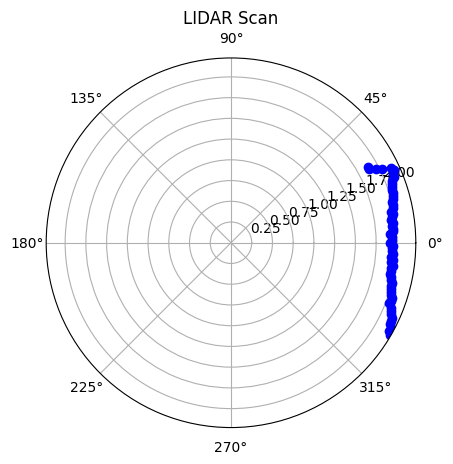

In [20]:
# Example of how to plot the data
import numpy as np
import matplotlib.pyplot as plt

ranges = np.array(scan_data.ranges)
angle = 180
angles = np.arange(-angle * scan_data.angle_increment, angle * scan_data.angle_increment, scan_data.angle_increment)
distances = np.concatenate((ranges[-angle:], ranges[:angle]))
plt.polar(angles, distances, 'bo')
plt.title('LIDAR Scan')
plt.show()

In [ ]:
# Your code goes here

## Task2: Draw a map by the laser scan data


Descriptions: SLAM

1. Run the map scanning command.

```bash
ros2 launch slam_toolbox online_async_launch.py use_sim_time:=True
```
<button data-commandlinker-command="terminal:create-new" class="jupyter-button">Open a Terminal</button>

2. Implement a simple vacuum robot path algorithm (e.g., "Random Bounce", "Spiral Pattern", "Wall-Following").

In [ ]:
# An example of random walk
import numpy as np

curr_z = 0
def radom_walk(msg):
    global curr_z
    ranges = np.array(msg.ranges)
    angle = 30
    distances = np.concatenate((ranges[-angle:], ranges[:angle]))
    min_dis = np.min(distances)
    if min_dis < 0.5:
        # stop and steer
        if curr_z == 0:
            curr_z = 0.3 if np.sum(ranges[-90:]) < np.sum(ranges[:90]) else -0.3
        velocity_publisher.publish_velocity(linear_x=0, angular_z=curr_z)
    else:
        # move forward again
        velocity_publisher.publish_velocity(linear_x=0.3, angular_z=0)

start_scan(radom_walk)
velocity_publisher.publish_velocity(linear_x=0, angular_z=0)

In [ ]:
# Your code goes here

### Todos:
- [ ] SLAM
- [ ] Naviation
- [ ] ...